In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from PIL import Image
import imutils

In [2]:
# Load the image
image_original1 = cv2.imread("1.jpg")
image_original2 = cv2.imread("2.jpg")

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
image_original1
image_original2

# Coordinates of the rectangle in image A (source image)
points_A = np.array([
    [2116, 1673],
    [2101, 2990],
    [15850, 1424],
    [15910, 2990]
], dtype=np.float32)

# Coordinates of the rectangle in image B (target image)
points_B = np.array([
    [2794, 1689],
    [2799, 2990],
    [16527, 1211],
    [16614, 2990]
], dtype=np.float32)

# Calculate the affine transformation matrix
matrix, status = cv2.estimateAffinePartial2D(points_B, points_A)

# Apply the affine transformation to the source image
rows, cols, ch = image_original1.shape
warped_image = cv2.warpAffine(image_original2, matrix, (cols, rows))

# Blend the images
alpha = 0.2
blended_image = cv2.addWeighted(image_original1, alpha, warped_image, 1 - alpha, 0)

# Save and display the result
cv2.imwrite('aligned_image2.jpg', blended_image)

True

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
image_original1
image_original2

# Define your feature points
features_image1 = [(2116, 1673), (2115, 1674), (2115, 1675), (2114, 1676), (2114, 1677), (2113, 1678), (2113, 1679), (2112, 1680), (2112, 1681), (2111, 1682), 
                   (2101, 2990), (2101, 2991), (2102, 2992), (2101, 2993), (2101, 2994), (2101, 2995), (2101, 2996), (2101, 2997), (2102, 2998), (2102, 2999), 
                   (15850, 1424), (15841, 1433), (15866, 1434), (15869, 1435), (15871, 1436), (15872, 1437), (15872, 1438), (15872, 1439), (15872, 1440), (15872, 1441), 
                   (15910, 2990), (15910, 2991), (15910, 2992), (15910, 2993), (15910, 2994), (15910, 2995), (15910, 2996), (15910, 2997), (15910, 2998), (15910, 2999)]
features_image2 = [(2794, 1689), (2791, 1690), (2790, 1691), (2790, 1692), (2789, 1693), (2789, 1694), (2789, 1695), (2788, 1696), (2787, 1697), (2787, 1698), 
                   (2799, 2990), (2799, 2991), (2799, 2992), (2799, 2993), (2799, 2994), (2799, 2995), (2799, 2996), (2799, 2997), (2799, 2998), (2799, 2999), 
                   (16527, 1211), (16537, 1212), (16539, 1213), (16540, 1214), (16540, 1215), (16541, 1216), (16541, 1217), (16541, 1218), (16541, 1219), (16541, 1220), 
                   (16614, 2990), (16615, 2991), (16615, 2992), (16614, 2993), (16613, 2994), (16613, 2995), (16614, 2996), (16614, 2997), (16614, 2998), (16614, 2999)]

# Convert feature points to numpy arrays
points_A = np.array(features_image1, dtype=np.float32)
points_B = np.array(features_image2, dtype=np.float32)

# Calculate the affine transformation matrix
matrix, status = cv2.estimateAffinePartial2D(points_B, points_A)

# Apply the affine transformation to the source image
rows, cols, ch = image_original1.shape
warped_image = cv2.warpAffine(image_original2, matrix, (cols, rows))

# Blend the images
alpha = 0.2
blended_image = cv2.addWeighted(image_original1, alpha, warped_image, 1 - alpha, 0)

# Save and display the result
cv2.imwrite('aligned_image2.jpg', blended_image)

True

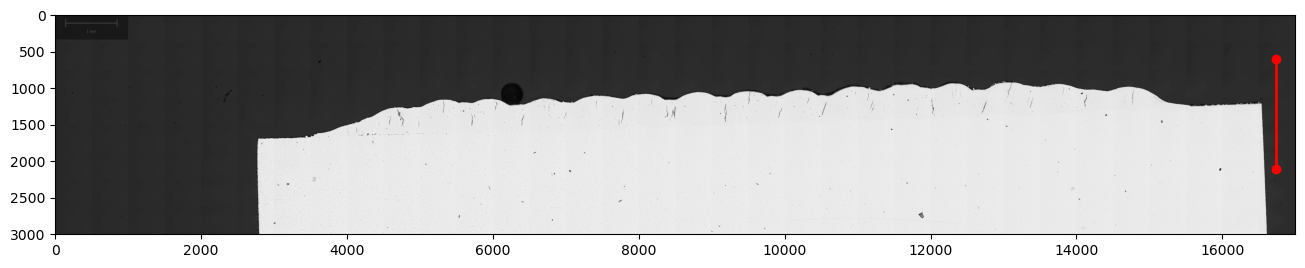

In [3]:
image = cv2.cvtColor(image_original2, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([16740, 16740], [600, 2100], marker='o', linestyle='-', linewidth=2, color='red')
plt.imshow(image, cmap='gray')

5 Global Value: []


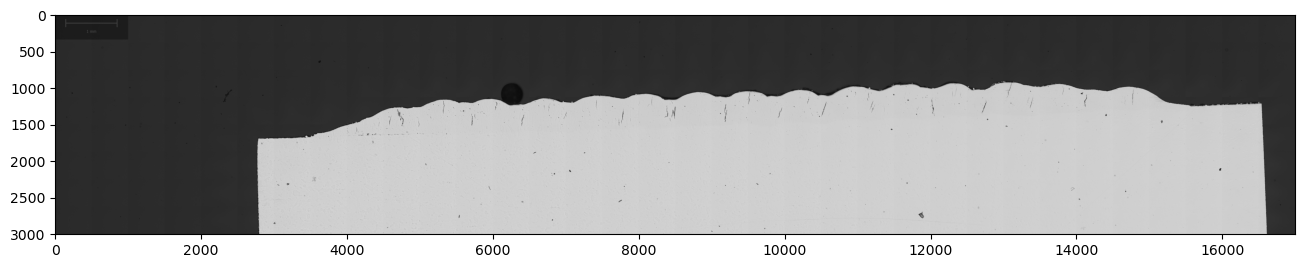

In [5]:
image_original = cv2.imread("2.jpg")
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2794, 1689
y_start, y_end = 16527, 1211
threshold = 110

selected_portions = image[y_start:y_end, x_start:x_end]
coordinates = []
first_values = []
coord = []

for y in range(selected_portions.shape[0]):
    for x in range(selected_portions.shape[1]):
        if selected_portions[y, x] > threshold:
            coordinates.append((x, y))
            break

coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))


for y in range(selected_portions.shape[0]):
    for x in range(selected_portions.shape[1]-1, -1, -1):
        value = selected_portions[y, x]
        if value > threshold and y > threshold:
            coordinates.append((x, y))
            # Assuming you also want to append the value to first_values
            first_values.append(value)
            break

# Select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

# Calculate global coordinates
first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("5 Global Value:", global_coordinates)

color = (255, 0, 0)
radius = 3

for coord in global_coordinates:
    x, y = coord  # Extract x and y coordinates
    cv2.circle(image, (x, y), radius, color, 1)

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16, 12))  
plt.imshow(rgb_image)

for coord in global_coordinates:
    plt.scatter(*coord, color='red', s=10) 

plt.show()

In [4]:
image = cv2.cvtColor(image_original1, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2050, 2200
y_start, y_end = 1500, -1
threshold = 105

selected_portions= image[y_start:y_end, x_start:x_end]
coordinates = []
first_values = []
coord = []

for y, row in enumerate(selected_portions):
    found = False
    for x, value in enumerate(row):
        if value > threshold:
            first_values.append(value)
            coordinates.append((x, y))
            found = True
            break
    if not found:
        first_values.append(None)
        coordinates.append(None)

#select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates1 = list(zip(first_values_x_global, first_values_y_global))
print("8 Global Value:", global_coordinates1)
firstpoint = global_coordinates1[:150]
lastpoint = global_coordinates1[-150:]
points1 = firstpoint + lastpoint

8 Global Value: [(2116, 1673), (2115, 1674), (2115, 1675), (2114, 1676), (2114, 1677), (2113, 1678), (2113, 1679), (2112, 1680), (2112, 1681), (2111, 1682), (2111, 1683), (2111, 1684), (2111, 1685), (2111, 1686), (2111, 1687), (2111, 1688), (2111, 1689), (2111, 1690), (2110, 1691), (2110, 1692), (2111, 1693), (2111, 1694), (2112, 1695), (2112, 1696), (2110, 1697), (2110, 1698), (2110, 1699), (2110, 1700), (2109, 1701), (2109, 1702), (2109, 1703), (2109, 1704), (2108, 1705), (2108, 1706), (2107, 1707), (2107, 1708), (2107, 1709), (2107, 1710), (2107, 1711), (2108, 1712), (2108, 1713), (2108, 1714), (2108, 1715), (2107, 1716), (2107, 1717), (2106, 1718), (2105, 1719), (2105, 1720), (2105, 1721), (2105, 1722), (2105, 1723), (2105, 1724), (2105, 1725), (2104, 1726), (2104, 1727), (2104, 1728), (2105, 1729), (2105, 1730), (2105, 1731), (2105, 1732), (2105, 1733), (2105, 1734), (2105, 1735), (2105, 1736), (2105, 1737), (2104, 1738), (2104, 1739), (2104, 1740), (2104, 1741), (2105, 1742), (21

In [5]:
image_original = cv2.imread("2.jpg")
gray_image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2670, 2870
y_start, y_end = 1500, -1
threshold = 110

selected_portions = gray_image[y_start:y_end, x_start:x_end]
coordinates = []
first_values = []
coord = []

# Iterate over each pixel in the flattened array
for y, row in enumerate(selected_portions):
    for x, value in enumerate(row):
        if value > threshold:
            first_values.append(value)
            coordinates.append((x, y))
            break
    else:
        first_values.append(None)
        coordinates.append(None)

# Select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

# Calculate global coordinates
first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates2 = list(zip(first_values_x_global, first_values_y_global))
print("8 Global Value:", global_coordinates2)
firstpoint = global_coordinates2[:150]
lastpoint = global_coordinates2[-150:]
points2 = firstpoint + lastpoint

8 Global Value: [(2794, 1689), (2791, 1690), (2790, 1691), (2790, 1692), (2789, 1693), (2789, 1694), (2789, 1695), (2788, 1696), (2787, 1697), (2787, 1698), (2786, 1699), (2786, 1700), (2786, 1701), (2786, 1702), (2785, 1703), (2785, 1704), (2785, 1705), (2786, 1706), (2786, 1707), (2785, 1708), (2785, 1709), (2785, 1710), (2785, 1711), (2786, 1712), (2786, 1713), (2786, 1714), (2785, 1715), (2785, 1716), (2785, 1717), (2784, 1718), (2784, 1719), (2784, 1720), (2783, 1721), (2783, 1722), (2782, 1723), (2782, 1724), (2782, 1725), (2782, 1726), (2782, 1727), (2782, 1728), (2782, 1729), (2782, 1730), (2783, 1731), (2783, 1732), (2782, 1733), (2781, 1734), (2781, 1735), (2781, 1736), (2781, 1737), (2781, 1738), (2781, 1739), (2781, 1740), (2780, 1741), (2780, 1742), (2780, 1743), (2779, 1744), (2779, 1745), (2779, 1746), (2779, 1747), (2780, 1748), (2780, 1749), (2780, 1750), (2780, 1751), (2780, 1752), (2779, 1753), (2779, 1754), (2779, 1755), (2779, 1756), (2779, 1757), (2779, 1758), (27

Global Coordinates: [(2116, 1671), (2117, 1671), (2118, 1671), (2119, 1671), (2120, 1671), (2121, 1671), (2122, 1672), (2123, 1671), (2124, 1671), (2125, 1671), (2223, 1672), (2224, 1672), (2225, 1672), (2226, 1672), (2227, 1671), (2228, 1671), (2229, 1672), (2230, 1672), (2235, 1669), (2236, 1669), (2237, 1669), (2238, 1669), (2239, 1669), (2240, 1670), (2241, 1670), (2242, 1672), (2243, 1671), (2244, 1671), (2263, 1672), (2264, 1671), (2265, 1671), (2266, 1672), (2267, 1672), (2268, 1672), (2269, 1672), (2270, 1672), (2271, 1672), (2272, 1672), (2273, 1671), (2274, 1671), (2275, 1671), (2276, 1671), (2277, 1671), (2278, 1671), (2279, 1671), (2280, 1671), (2281, 1671), (2282, 1671), (2283, 1671), (2284, 1671), (2285, 1671), (2286, 1671), (2287, 1671), (2288, 1671), (2289, 1671), (2290, 1671), (2291, 1671), (2292, 1672), (2293, 1671), (2294, 1672), (2295, 1672), (2296, 1671), (2297, 1671), (2298, 1671), (2299, 1671), (2300, 1671), (2301, 1671), (2302, 1671), (2303, 1672), (2304, 1672),

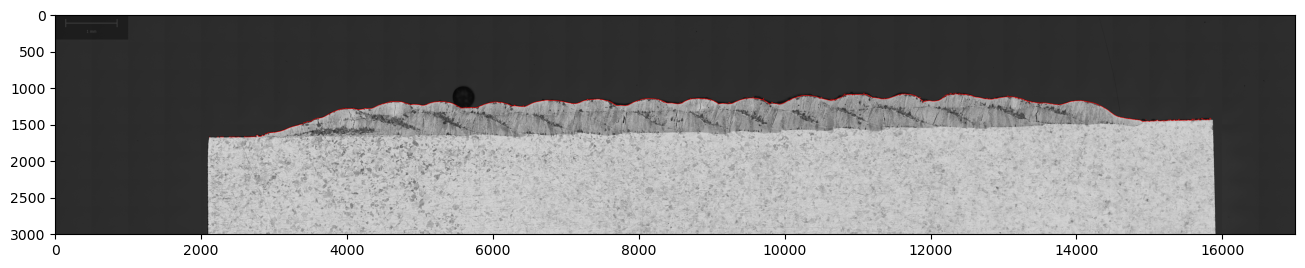

In [3]:
image_original = cv2.imread('1.jpg')
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# Set the region of interest (ROI)
x_start, x_end = 2116, 15850
y_start, y_end = 1000, 1673

# Select the portion of the image
selected_portions = image[y_start:y_end, x_start:x_end]

# Apply edge detection
edges = cv2.Canny(selected_portions, 50, 150)

# Find the upper boundary coordinates
coordinates = []
for x in range(edges.shape[1]):
    for y in range(edges.shape[0]):
        if edges[y, x] > 0:
            coordinates.append((x, y))
            break

# Convert local coordinates to global coordinates
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("Global Coordinates:", global_coordinates)

# Draw circles on the original image
image_with_dots = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
color = (0, 0, 255)  # Red color in BGR
radius = 3

for coord in global_coordinates:
    x, y = coord  # Extract x and y coordinates
    cv2.circle(image_with_dots, (x, y), radius, color, -1)  # -1 to fill the circle

# Convert to RGB for displaying with matplotlib
rgb_image = cv2.cvtColor(image_with_dots, cv2.COLOR_BGR2RGB)

cv2.imwrite("rgb1.jpg", rgb_image)
# Display the image with marked points
plt.figure(figsize=(16, 12))
plt.imshow(rgb_image)
plt.show()

Global Coordinates: [(2594, 1672), (2595, 1672), (2596, 1672), (2597, 1672), (2598, 1672), (2685, 1672), (2686, 1672), (2687, 1672), (2688, 1672), (2689, 1672), (2696, 1672), (2697, 1672), (2698, 1672), (2699, 1672), (2700, 1672), (2720, 1672), (2721, 1672), (2722, 1672), (2723, 1672), (2726, 1672), (2727, 1672), (2728, 1671), (2729, 1671), (2730, 1671), (2731, 1671), (2732, 1671), (2733, 1672), (2734, 1671), (2735, 1671), (2736, 1671), (2737, 1672), (2738, 1672), (2741, 1672), (2742, 1672), (2757, 1657), (2758, 1657), (2759, 1656), (2760, 1655), (2761, 1653), (2762, 1652), (2763, 1651), (2764, 1651), (2765, 1650), (2766, 1650), (2767, 1649), (2768, 1649), (2769, 1649), (2770, 1649), (2771, 1649), (2772, 1649), (2773, 1649), (2774, 1650), (2775, 1650), (2776, 1650), (2777, 1651), (2778, 1651), (2779, 1652), (2780, 1652), (2781, 1653), (2782, 1653), (2783, 1654), (2784, 1658), (2785, 1659), (2786, 1660), (2787, 1661), (2788, 1661), (2789, 1669), (2790, 1669), (2791, 1669), (2792, 1668),

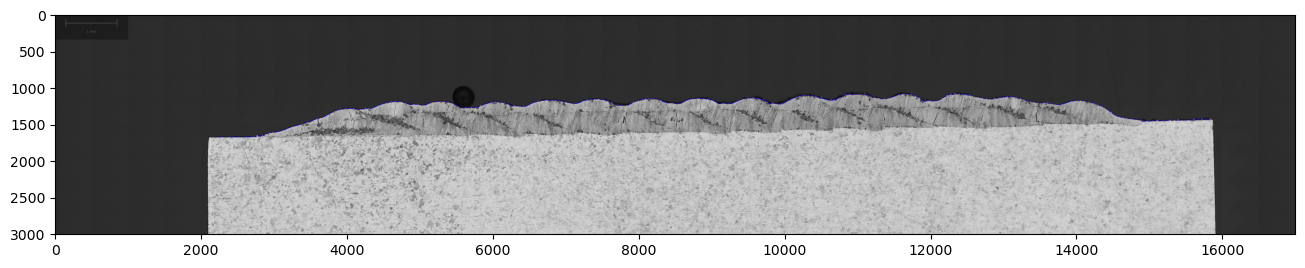

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the original image
image_original = cv2.imread('rgb1.jpg')

# Convert the original image to grayscale
gray_image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# Set the region of interest (ROI)
x_start, x_end = 2116, 15850
y_start, y_end = 1000, 1673

# Select the portion of the image
selected_portions = gray_image[y_start:y_end, x_start:x_end]

# Apply edge detection
edges = cv2.Canny(selected_portions, 50, 150)

# Find the upper boundary coordinates
coordinates = []
for x in range(edges.shape[1]):
    for y in range(edges.shape[0]):
        if edges[y, x] > 0:
            coordinates.append((x, y))
            break

# Convert local coordinates to global coordinates
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("Global Coordinates:", global_coordinates)

# Find peaks (local maxima and minima) in the y-coordinates
y_values = np.array(first_values_y_global, dtype=np.float32)

# Detect peaks and valleys
peaks, _ = find_peaks(y_values, distance=50)  # Adjust distance based on your requirement
valleys, _ = find_peaks(-y_values, distance=50)

# Combine peaks and valleys
key_points_indices = np.concatenate((peaks, valleys))
key_points_indices.sort()

key_points = [global_coordinates[i] for i in key_points_indices]

# Draw circles on the original image for key points
image_with_dots = image_original.copy()
color = (0, 165, 255)  # Orange color in BGR
radius = 5

for coord in key_points:
    x, y = coord  # Extract x and y coordinates
    cv2.circle(image_with_dots, (x, y), radius, color, -1)  # -1 to fill the circle

# Save and display the image with marked points
cv2.imwrite("image_with_dots.jpg", image_with_dots)

# Convert to RGB for displaying with matplotlib
rgb_image = cv2.cvtColor(image_with_dots, cv2.COLOR_BGR2RGB)

# Display the image with marked points
plt.figure(figsize=(16, 12))
plt.imshow(rgb_image)
plt.show()

In [7]:
image_original1 = cv2.imread("1.jpg")
image_original2 = cv2.imread("2.jpg")
cv2.namedWindow('Original Image 1', cv2.WINDOW_NORMAL)
cv2.namedWindow('Aligned Image 1', cv2.WINDOW_NORMAL)
cv2.namedWindow('Image 2', cv2.WINDOW_NORMAL)
# Format: [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
coordinates_image1 = [(2116, 1673), (2102, 2999), (15850, 1424), (15910, 2999)]
coordinates_image2 = [(2794, 1689), (2799, 2999), (16527, 1211), (16614, 2999)]

# Estimate the affine transformation matrix
affine_matrix, _ = cv2.estimateAffine2D(np.array(coordinates_image1), np.array(coordinates_image2))

# Warp image1 using the estimated affine transformation matrix
aligned_image1 = cv2.warpAffine(image_original1, affine_matrix, (image_original1.shape[1], image_original1.shape[0]))

# Display the original and aligned images
cv2.imwrite("Aligned.jpg", aligned_image1)


True

: 

In [4]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
gray_image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2799, 16527
y_start, y_end = 600, 2100
threshold = 120

selected_portions = gray_image[y_start:y_end, x_start:x_end]
coordinates = []
first_values = []
coord = []

for x in range(selected_portions.shape[1]):
    for y in range(selected_portions.shape[0]):
        value = selected_portions[y, x]
        if value > threshold and y > threshold:
            coordinates.append((x, y))
            # Assuming you also want to append the value to first_values
            first_values.append(value)
            break

coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("1 Coordinates:", coordinates)
print("2 X Local Value:", first_values_x_local)
print("3 X Global Value:", first_values_x_global)
print("4 Y Global Value:", first_values_y_global)
print("5 Global Value:", global_coordinates)


1 Coordinates: [(0, 1091), (1, 1091), (2, 1091), (3, 1091), (4, 1091), (5, 1092), (6, 1092), (7, 1092), (8, 1093), (9, 1093), (10, 1093), (11, 1093), (12, 1093), (13, 1093), (14, 1093), (15, 1093), (16, 1093), (17, 1093), (18, 1093), (19, 1093), (20, 1093), (21, 1093), (22, 1094), (23, 1093), (24, 1093), (25, 1093), (26, 1092), (27, 1092), (28, 1092), (29, 1092), (30, 1092), (31, 1092), (32, 1092), (33, 1093), (34, 1093), (35, 1093), (36, 1093), (37, 1093), (38, 1093), (39, 1093), (40, 1093), (41, 1092), (42, 1092), (43, 1092), (44, 1092), (45, 1092), (46, 1092), (47, 1092), (48, 1092), (49, 1091), (50, 1091), (51, 1091), (52, 1091), (53, 1091), (54, 1091), (55, 1092), (56, 1092), (57, 1093), (58, 1093), (59, 1093), (60, 1094), (61, 1094), (62, 1094), (63, 1094), (64, 1094), (65, 1094), (66, 1094), (67, 1094), (68, 1095), (69, 1095), (70, 1095), (71, 1095), (72, 1094), (73, 1095), (74, 1095), (75, 1096), (76, 1096), (77, 1096), (78, 1095), (79, 1095), (80, 1095), (81, 1095), (82, 1095)

In [8]:
# Convert the coordinates to a NumPy array of shape (N, 1, 2)
coordinates_array = np.array([global_coordinates], dtype=np.int32)

polyline_image = np.zeros_like(image_original)

# Draw the polyline on the image
cv2.polylines(image_original, [coordinates_array], isClosed=False, color=(255, 0, 0), thickness=2)
result_image = cv2.addWeighted(image_original, 1, polyline_image, 1, 0)

# Save the image with the polyline
cv2.imwrite("3.jpg", result_image)

True

In [5]:
coordinates_array = np.array(global_coordinates)
cv2.namedWindow('boundary_image', cv2.WINDOW_NORMAL)

min_x = min(coord[0] for coord in global_coordinates)
max_x = max(coord[0] for coord in global_coordinates)
min_y = min(coord[1] for coord in global_coordinates)
max_y = max(coord[1] for coord in global_coordinates)

# Create a blank image with a white background
boundary_image = np.zeros((max_y - min_y + 1, max_x - min_x + 1, 3), dtype=np.uint8)
boundary_image.fill(255)

# Draw a polygon around the coordinates
cv2.polylines(boundary_image, [coordinates_array], isClosed=True, color=(0, 0, 255), thickness=2)

# Show the image with the boundary
cv2.imshow("boundary_image", boundary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
gray_image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 16740, 16740
y_start, y_end = 600, 2100
threshold = 120

selected_portions = gray_image[y_start:y_end, x_start:x_end]


[  7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226]


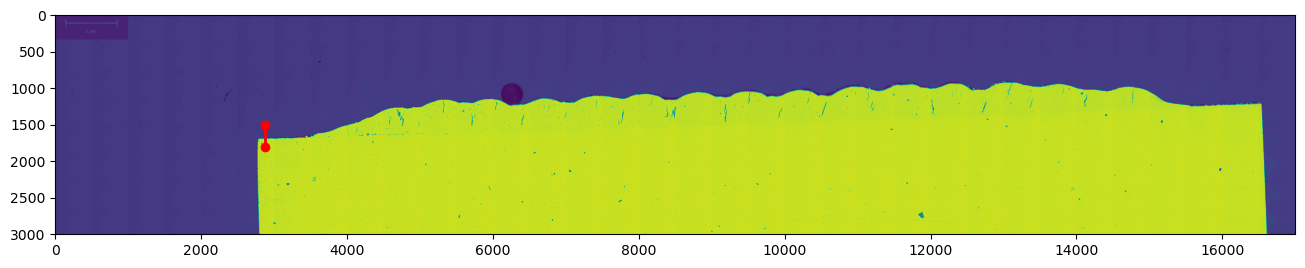

In [11]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
a = np.unique(image)
print(a)

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([2870, 2870], [1500, 1800], marker='o', linestyle='-', linewidth=2, color='red')
plt.imshow(image)

8 Global Value: [(16527, 1211), (16537, 1212), (16539, 1213), (16540, 1214), (16540, 1215), (16541, 1216), (16541, 1217), (16541, 1218), (16541, 1219), (16541, 1220), (16541, 1221), (16541, 1222), (16542, 1223), (16542, 1224), (16542, 1225), (16542, 1226), (16542, 1227), (16542, 1228), (16542, 1229), (16542, 1230), (16542, 1231), (16542, 1232), (16542, 1233), (16542, 1234), (16542, 1235), (16542, 1236), (16542, 1237), (16543, 1238), (16543, 1239), (16543, 1240), (16543, 1241), (16543, 1242), (16543, 1243), (16543, 1244), (16543, 1245), (16543, 1246), (16543, 1247), (16543, 1248), (16543, 1249), (16543, 1250), (16543, 1251), (16543, 1252), (16543, 1253), (16543, 1254), (16543, 1255), (16543, 1256), (16543, 1257), (16543, 1258), (16543, 1259), (16543, 1260), (16543, 1261), (16544, 1262), (16544, 1263), (16544, 1264), (16544, 1265), (16544, 1266), (16544, 1267), (16544, 1268), (16544, 1269), (16544, 1270), (16544, 1271), (16544, 1272), (16544, 1273), (16544, 1274), (16544, 1275), (16544, 

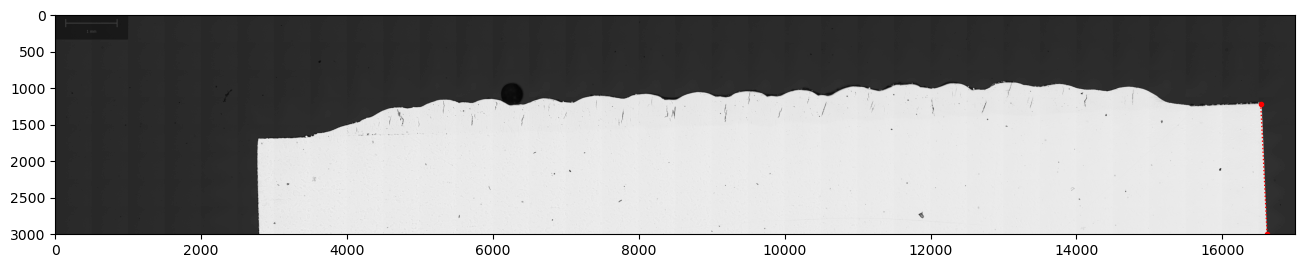

In [6]:
image_original = cv2.imread("2.jpg")
gray_image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 16440, 16740
y_start, y_end = 1100, -1

threshold = 110
selected_portions = gray_image[y_start:y_end, x_start:x_end]
coordinates = []
first_values = []

for y in range(selected_portions.shape[0]):
    for x in range(selected_portions.shape[1]-1, -1, -1):
        value = selected_portions[y, x]
        if value > threshold and y > threshold:
            coordinates.append((x, y))
            # Assuming you also want to append the value to first_values
            first_values.append(value)
            break

# Select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

# Calculate global coordinates
first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

#print("Selected Coordinates:", coordinates)
#print("5 X Local Value:", first_values_x_local)
#print("6 X Global Value:", first_values_x_global)
print("8 Global Value:", global_coordinates)
num_coordinates_count = len(coordinates)
#print("4 Coordinates Number Count:", num_coordinates_count)

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([first_values_x_global[0], first_values_x_global[-1]], [first_values_y_global[0], first_values_y_global[-1]], marker='.', linestyle=':', linewidth=1, color='red')
plt.imshow(gray_image, cmap='gray')

array([  7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 18

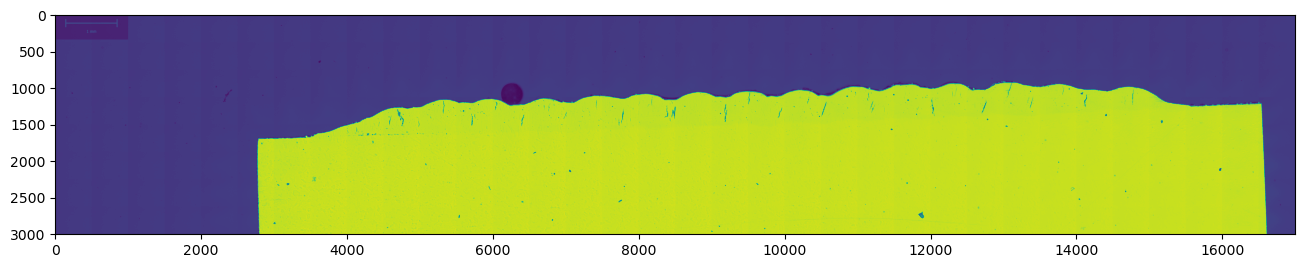

In [8]:
image_original = cv2.imread("2.jpg")
gray_image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.imshow(gray_image)
gray_image.shape

x_start, x_end = 2670, 2870
y_start, y_end = 1500, -1
selected_portions = gray_image[y_start:y_end, x_start:x_end]
#print(selected_portions)
np.unique(gray_image)


8 Global Value: [(2794, 1690), (2790, 1691), (2790, 1692), (2789, 1693), (2789, 1694), (2789, 1695), (2788, 1696), (2787, 1697), (2787, 1698), (2786, 1699), (2786, 1700), (2786, 1701), (2786, 1702), (2786, 1703), (2786, 1704), (2786, 1705), (2786, 1706), (2786, 1707), (2786, 1708), (2785, 1709), (2785, 1710), (2785, 1711), (2786, 1712), (2786, 1713), (2786, 1714), (2785, 1715), (2785, 1716), (2785, 1717), (2785, 1718), (2784, 1719), (2784, 1720), (2784, 1721), (2783, 1722), (2783, 1723), (2782, 1724), (2782, 1725), (2782, 1726), (2782, 1727), (2782, 1728), (2782, 1729), (2782, 1730), (2783, 1731), (2783, 1732), (2782, 1733), (2782, 1734), (2781, 1735), (2781, 1736), (2781, 1737), (2781, 1738), (2781, 1739), (2781, 1740), (2781, 1741), (2780, 1742), (2780, 1743), (2780, 1744), (2779, 1745), (2779, 1746), (2779, 1747), (2780, 1748), (2780, 1749), (2780, 1750), (2780, 1751), (2780, 1752), (2780, 1753), (2779, 1754), (2779, 1755), (2779, 1756), (2779, 1757), (2779, 1758), (2779, 1759), (27

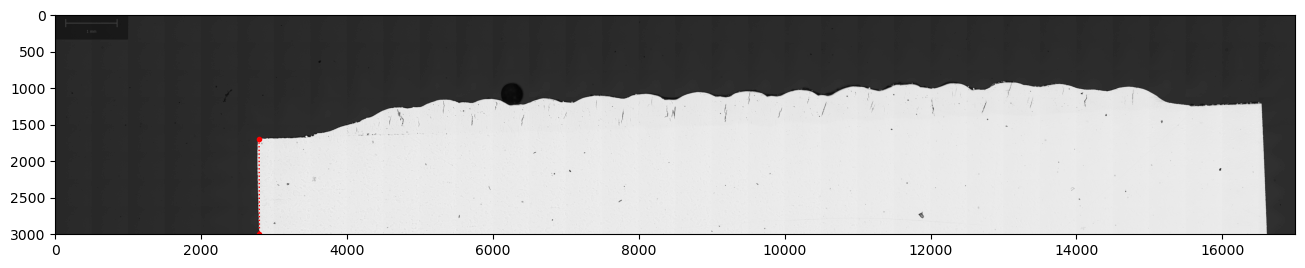

In [4]:
image_original = cv2.imread("2.jpg")
gray_image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2670, 2870
y_start, y_end = 1500, -1

threshold = 120

selected_portions = gray_image[y_start:y_end, x_start:x_end]

#flattened_arr = selected_portions.reshape(-1, 3)
coordinates = []
first_values = []

# Iterate over each pixel in the flattened array
for y, row in enumerate(selected_portions):
    for x, value in enumerate(row):
        if value > threshold:
            first_values.append(value)
            coordinates.append((x, y))
            break
    else:
        first_values.append(None)
        coordinates.append(None)

# Select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

# Calculate global coordinates
first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

#print("Selected Coordinates:", coordinates)
#print("5 X Local Value:", first_values_x_local)
#print("6 X Global Value:", first_values_x_global)
print("8 Global Value:", global_coordinates)
num_coordinates_count = len(coordinates)
#print("4 Coordinates Number Count:", num_coordinates_count)

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([first_values_x_global[0], first_values_x_global[-1]], [first_values_y_global[0], first_values_y_global[-1]], marker='.', linestyle=':', linewidth=1, color='red')
plt.imshow(gray_image, cmap='gray')

1 First Values: [44, 44, 44, 45, 45, 45, 44, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 44, 44, 43, 43, 45, 43, 43, 43, 44, 44, 44, 44, 44, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 45, 43, 43, 44, 44, 43, 45, 45, 44, 44, 44, 44, 44, 45, 44, 44, 44, 44, 44, 43, 43, 43, 45, 45, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 44, 44, 44, 45, 45, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 44, 44, 43, 44, 44, 44, 44, 44, 44, 45, 45, 44, 44, 44, 45, 45, 45, 45, 44, 44, 44, 44, 45, 45, 45, 44, 45, 45, 45, 45, 45, 45, 45, 45, 44, 45, 45, 45, 44, 44, 45, 45, 44, 45, 45, 44, 44, 44, 44, 43, 46, 45, 44, 43, 42, 42, 42, 42, 45, 44, 43, 43, 44, 44, 43, 42, 43, 44, 44, 44, 44, 45, 45, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 45, 45, 44, 44, 45, 45, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 46, 44, 44, 44,

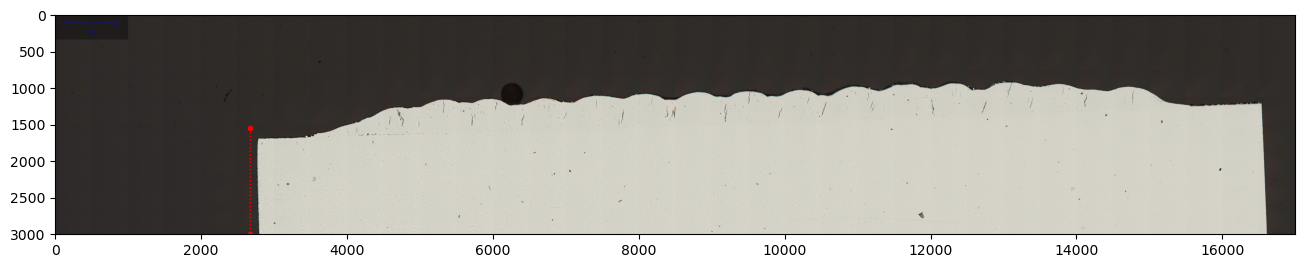

In [2]:
image = cv2.imread("2.jpg")
image_original = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2670, 2870
y_start, y_end = 1550, -1
threshold = 100

selected_portions = image_original[y_start:y_end, x_start:x_end]
coordinates = []
first_values = []
coord = []

for y, row in enumerate(selected_portions):
    found = False
    for x, value in enumerate(row):
        if value < threshold:
            first_values.append(value)
            coordinates.append((x, y))
            found = True
            break
    if not found:
        first_values.append(None)
        coordinates.append(None)

# Select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("1 First Values:", first_values)
print("2 Coordinates:", coordinates)
num_first_values = len(first_values)
print("3 First Values Number Count:", num_first_values)
num_coordinates_count = len(coordinates)
print("4 Coordinates Number Count:", num_coordinates_count)
print("5 X Local Value:", first_values_x_local)
print("6 X Global Value:", first_values_x_global)
print("7 Y Global Value:", first_values_y_global)
print("8 Global Value:", global_coordinates)

# Plot the image and points
fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
if first_values_x_global and first_values_y_global:
    plt.plot([first_values_x_global[0], first_values_x_global[-1]], [first_values_y_global[0], first_values_y_global[-1]], marker='.', linestyle=':', linewidth=1, color='red')
plt.imshow(image, cmap='gray')
plt.show()


In [34]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2116, 15850
y_start, y_end = 1000, 1673
threshold = 100

selected_portions = image[y_start:y_end, x_start:x_end]
selected_coordinates = []
coordinates = []
first_values = []
coord = []

# Iterate through the image array
for y in range(selected_portions.shape[0]):
    for x in range(selected_portions.shape[1]):
        if image[y, x] > threshold:
            selected_coordinates.append((x, y))

print("Selected Coordinates:")
print(selected_coordinates)

Selected Coordinates:
[]


1 Coordinates: [(8976, 73), (8974, 74), (8974, 75), (10218, 76), (10219, 77), (10226, 78), (10151, 82), (9491, 83), (9489, 84), (9486, 85), (9484, 86), (8925, 87), (8756, 88), (8771, 89), (8747, 90), (8744, 91), (8741, 92), (8738, 93), (8736, 94), (8735, 95), (8735, 96), (8734, 97), (8734, 98), (8733, 99), (8730, 100), (8717, 101), (8717, 102), (8171, 103), (8140, 104), (8149, 105), (8129, 106), (8129, 107), (8130, 108), (8122, 109), (8122, 110), (8100, 111), (8100, 112), (8101, 113), (8109, 114), (8124, 115), (8098, 116), (8088, 117), (8069, 118), (8066, 119), (8062, 120), (8059, 121), (8057, 122), (8055, 123), (8052, 124), (8050, 125), (8050, 126), (8051, 127), (7456, 128), (7456, 129), (7457, 130), (7458, 131), (7458, 132), (8045, 133), (8024, 134), (8021, 135), (8019, 136), (8016, 137), (7421, 138), (7402, 139), (7392, 140), (7381, 141), (7384, 142), (6693, 143), (6676, 144), (6005, 145), (5990, 146), (5980, 147), (5973, 148), (5968, 149), (5963, 150), (5958, 151), (5323, 152), (52

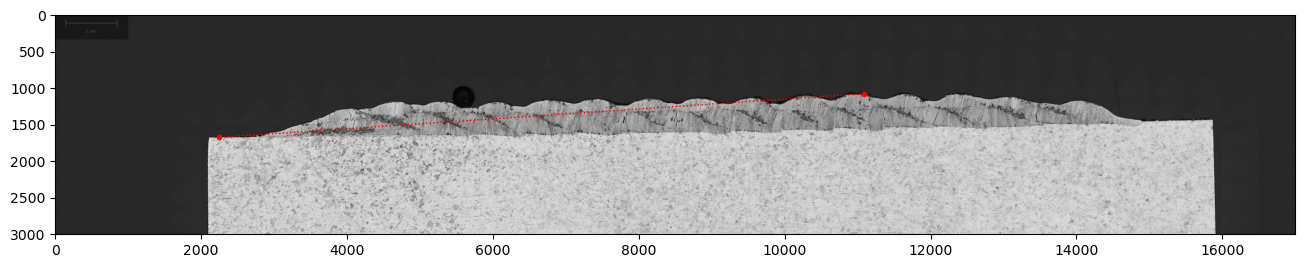

In [20]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 2116, 15850
y_start, y_end = 1000, 1673
threshold = 100

selected_portions = image[y_start:y_end, x_start:x_end]
coordinates = []
first_values = []
coord = []

# Iterate through the image array in reverse order along the x-axis
for y in range(selected_portions.shape[0]):
    for x in range(selected_portions.shape[1]):
        if selected_portions[y, x] > threshold:
            coordinates.append((x, y))
            break

coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]

first_values_x_global = [x + x_start for x in first_values_x_local]
first_values_y_global = [y + y_start for y in first_values_y_local]
global_coordinates = list(zip(first_values_x_global, first_values_y_global))

print("1 Coordinates:", coordinates)
print("2 X Local Value:", first_values_x_local)
print("3 X Global Value:", first_values_x_global)
print("4 Y Global Value:", first_values_y_global)
print("5 Global Value:", global_coordinates)

fig = plt.figure(figsize=(16, 12))
plt.plot([first_values_x_global[0], first_values_x_global[-1]], [first_values_y_global[0], first_values_y_global[-1]], marker='.', linestyle=':', linewidth=1, color='red')
plt.imshow(image, cmap='gray')


In [35]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

x_start, x_end = 15820, 15950
y_start, y_end = 1400, -1
threshold = 105

selected_portion = image[y_start:y_end, x_start:x_end]
coordinates = []
first_values = []
coord = []

In [12]:
threshold = 105
first_values = []
coordinates = []

for y, row in enumerate(selected_portion):
    found = False
    for x, value in enumerate(row):
        if value > threshold:
            first_values.append(value)
            coordinates.append((x, y))
            found = True
            break
    if not found:
        first_values.append(None)
        coordinates.append(None)

print(first_values) #print 1 

#select only values which are not None
coordinates = [coord for coord in coordinates if coord is not None]
first_values_x_local = [coord[0] for coord in coordinates]
first_values_y_local = [coord[1] for coord in coordinates]



num_first_values = len(first_values)
print(num_first_values) #print 2

num_selected_values = len(selected_portion)
print(num_selected_values) #print 3

num_coordinates_count = len(coordinates)
print(num_coordinates_count) #print 4
print(coordinates)


[None, None, None, 125, 109, 157, 144, 163, 137, 176, 156, 145, 110, 144, 165, 161, 166, 177, 171, 160]
20
20
17
[(6, 3), (5, 4), (5, 5), (4, 6), (4, 7), (3, 8), (3, 9), (2, 10), (2, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19)]


In [16]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

bottom_image = image == 38

cols =[1,-1]

start = np.where(bottom_image[:,cols[0]] == True)[0][0]
end = np.where(bottom_image[:,cols[1]] == True)[0][0]

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([cols[0], 3564], [start, end], marker='o', linestyle='-', linewidth=2, color='red')
plt.imshow(image_original, cmap='gray')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [89]:
bottom_image.shape[1]

3565

In [91]:
arr = []

for i in range(bottom_image.shape[1]):
    arr.append(np.where(bottom_image[:,i] == True)[0][0])

In [90]:
arr1 = []

for i in range(bottom_image.shape[0]):
    arr.append(np.where(bottom_image[:,i] == True)[0][0])

In [36]:
range(len(bottom_image.shape[1]))

TypeError: object of type 'int' has no len()

In [75]:
arr

[1196,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1088,
 1088,
 1088,
 1088,
 1088,
 1088,
 1088,
 1087,
 1087,
 1087,
 1087,
 1087,
 1087,
 1086,
 1086,
 1086,
 1086,
 1086,
 1086,
 1085,
 1085,
 1085,
 1085,
 1085,
 1085,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,

In [61]:
np.min(arr), np.max(arr)

(1002, 1196)

In [60]:
np.mean(arr)

1046.6165497896213

In [47]:
top_values = []

for i,j in zip(range(bottom_image.shape[1]), arr):
    top_values.append([i,j])

In [93]:
top_values

[[0, 1196],
 [1, 1091],
 [2, 1091],
 [3, 1091],
 [4, 1091],
 [5, 1091],
 [6, 1091],
 [7, 1091],
 [8, 1091],
 [9, 1091],
 [10, 1091],
 [11, 1091],
 [12, 1091],
 [13, 1091],
 [14, 1091],
 [15, 1091],
 [16, 1091],
 [17, 1091],
 [18, 1091],
 [19, 1091],
 [20, 1091],
 [21, 1091],
 [22, 1091],
 [23, 1091],
 [24, 1091],
 [25, 1091],
 [26, 1091],
 [27, 1091],
 [28, 1091],
 [29, 1091],
 [30, 1091],
 [31, 1091],
 [32, 1091],
 [33, 1091],
 [34, 1091],
 [35, 1091],
 [36, 1091],
 [37, 1091],
 [38, 1091],
 [39, 1091],
 [40, 1091],
 [41, 1091],
 [42, 1091],
 [43, 1090],
 [44, 1090],
 [45, 1090],
 [46, 1090],
 [47, 1090],
 [48, 1090],
 [49, 1090],
 [50, 1090],
 [51, 1090],
 [52, 1090],
 [53, 1090],
 [54, 1089],
 [55, 1089],
 [56, 1089],
 [57, 1089],
 [58, 1089],
 [59, 1089],
 [60, 1089],
 [61, 1089],
 [62, 1089],
 [63, 1088],
 [64, 1088],
 [65, 1088],
 [66, 1088],
 [67, 1088],
 [68, 1088],
 [69, 1088],
 [70, 1087],
 [71, 1087],
 [72, 1087],
 [73, 1087],
 [74, 1087],
 [75, 1087],
 [76, 1086],
 [77, 108

In [111]:
top_values1 = np.array([subarray[0] for subarray in top_values], dtype=np.float64)
top_values2 = np.array([subarray[1] for subarray in top_values], dtype=np.float64)
print(top_values1)


[0.000e+00 1.000e+00 2.000e+00 ... 3.562e+03 3.563e+03 3.564e+03]


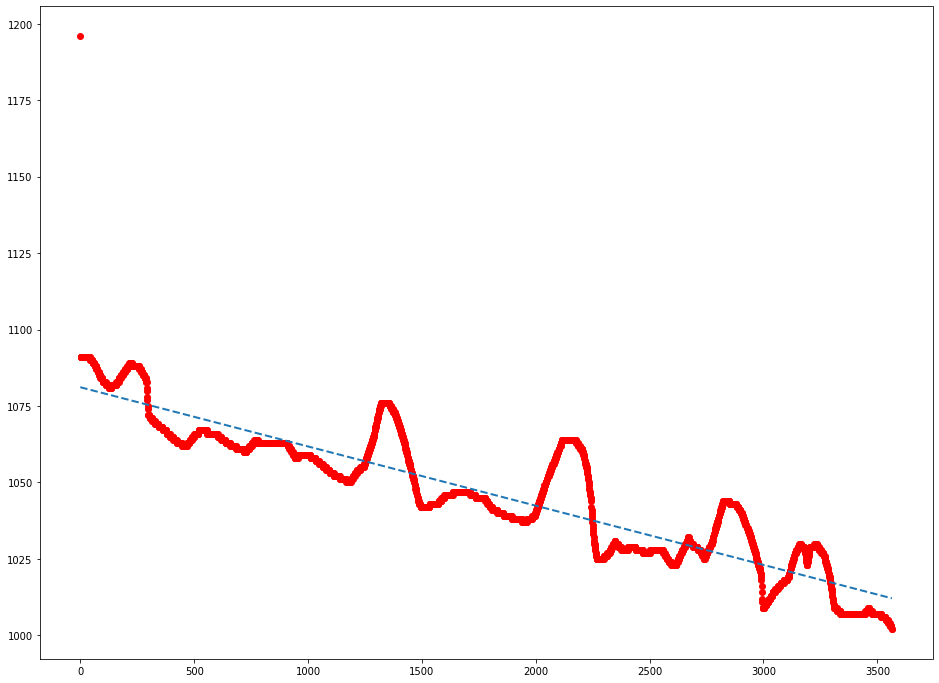

In [140]:
fig = plt.figure(figsize=(16, 12))
a, b = np.polyfit(top_values1, top_values2, 1)
#plt.plot([c], marker='o', linestyle='-', linewidth=1, color='red')
plt.scatter(top_values1, top_values2, color='red')
a1 = top_values1
a2 = a*top_values1+b
plt.plot(a1, a2, linestyle='--', linewidth=2)
#plt.plot(top_values1, a*top_values1+b)
#plt.imshow(image, cmap='gray')

In [146]:
first_value = a2[0]
last_value = a2[-1]
print(first_value, last_value)

1081.1459497089152 1012.0871498703273


In [147]:
x1, y1 = 0, 1081
x2, y2 = 3564, 1012

In [150]:
angle_radius = math.atan2(y2 - y1, x2 - x1)
angle_degree = math.degrees(angle_radius)

In [151]:
print(angle_radius, angle_degree)

-0.01935785103186327 -1.1091231645687312


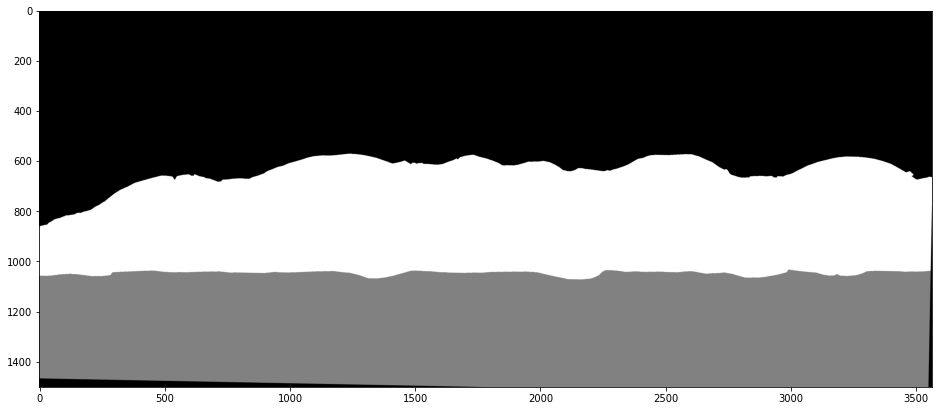

In [158]:
fig = plt.figure(figsize=(16, 12))
degree_rotate = -1.1091231645687312
rotated_image = imutils.rotate(image, angle= degree_rotate)
plt.imshow(rotated_image, cmap='gray')

In [58]:
image[:,0]

array([ 0,  0,  0, ..., 38, 38, 38], dtype=uint8)

In [71]:
# [1046]*bottom_image.shape[0]

In [80]:
arr

[1196,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1091,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1090,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1089,
 1088,
 1088,
 1088,
 1088,
 1088,
 1088,
 1088,
 1087,
 1087,
 1087,
 1087,
 1087,
 1087,
 1086,
 1086,
 1086,
 1086,
 1086,
 1086,
 1085,
 1085,
 1085,
 1085,
 1085,
 1085,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1084,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1083,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1081,
 1082,
 1082,
 1082,
 1082,
 1082,
 1082,

In [81]:
np.argmin(arr)

3563

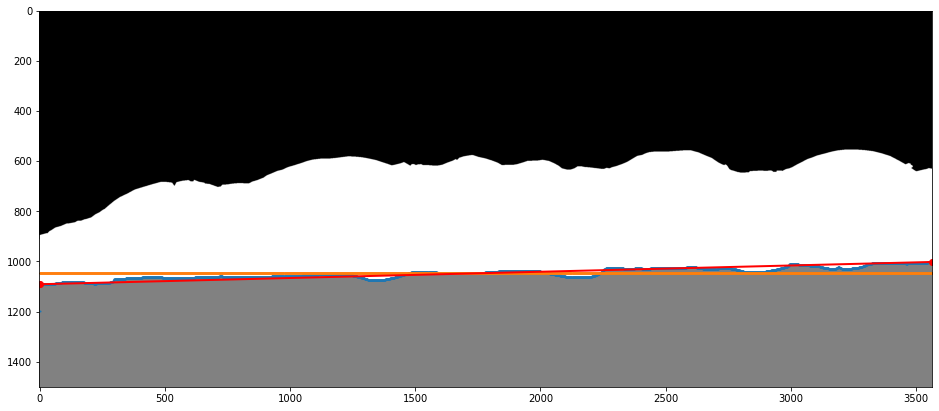

In [127]:
fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([cols[0], 3564], [start, end], marker='o', linestyle='-', linewidth=2, color='red')
plt.scatter(range(bottom_image.shape[1]), arr, s=1)
plt.scatter(range(bottom_image.shape[1]), [1046]*(bottom_image.shape[1]), s=1)
plt.imshow(image, cmap='gray')

In [87]:
bottom_image[1,-1]

False

In [88]:
b=np.where(bottom_image==True)

In [90]:
np.argmin(b[1])
b[0][np.argmin(b[1])]

1196

In [80]:
np.where(bottom_image[:,cols[1]] == True)

(array([1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
        1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
        1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
        1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045,
        1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056,
        1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067,
        1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078,
        1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089,
        1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100,
        1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111,
        1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
        1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133,
        1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144,
        1145, 1146, 1147, 1148, 1149, 

In [81]:
np.arange(bottom_image.shape[1])

array([   0,    1,    2, ..., 3562, 3563, 3564])

In [82]:
np.arange(bottom_image.shape[0])

array([   0,    1,    2, ..., 1498, 1499, 1500])

In [6]:
np.unique(image)

array([ 0, 38, 75], dtype=uint8)

In [7]:
image.shape

(1501, 3565)

In [8]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

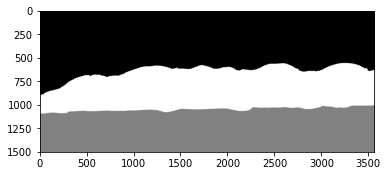

In [9]:
plt.imshow(image, cmap='gray')

In [23]:
tick_params(labeltop=True, labelright=True)

NameError: name 'tick_params' is not defined

In [10]:
image.shape

(1501, 3565)

In [11]:
np.unique(image)

array([ 0, 38, 75], dtype=uint8)

In [12]:
image.shape

(1501, 3565)

In [13]:
image

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [38, 38, 38, ..., 38, 38, 38],
       [38, 38, 38, ..., 38, 38, 38],
       [38, 38, 38, ..., 38, 38, 38]], dtype=uint8)

In [14]:
image_bottom = image[image == 75]

In [15]:
image_bottom.shape

(1464927,)

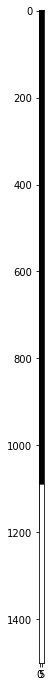

In [16]:
fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.imshow((image == 38)[:,:10], cmap='gray')

In [21]:
bottom_image = image == 38

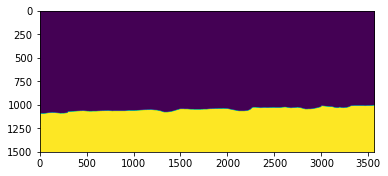

In [22]:
plt.imshow(bottom_image)

In [40]:
np.where(bottom_image[:,1] == True)

(array([1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101,
        1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112,
        1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123,
        1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134,
        1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145,
        1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156,
        1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167,
        1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178,
        1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189,
        1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200,
        1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211,
        1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222,
        1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233,
        1234, 1235, 1236, 1237, 1238, 

In [49]:
np.where(bottom_image[1:,:] == True)

(array([1001, 1001, 1002, ..., 1499, 1499, 1499], dtype=int64),
 array([3563, 3564, 3555, ..., 3562, 3563, 3564], dtype=int64))

In [ ]:
np.where(bottom_image[1:,:] == True)

(array([1001, 1001, 1002, ..., 1499, 1499, 1499], dtype=int64),
 array([3563, 3564, 3555, ..., 3562, 3563, 3564], dtype=int64))

In [ ]:
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

bottom_image = image == 38

start = np.where(bottom_image[:,1] == True)[0][0]
end = np.where(bottom_image[:,-1] == True)[0][0]

fig = plt.figure(figsize=(16, 12))  # Adjust the numbers as needed
plt.plot([0, 3564], [start, end], marker='o', linestyle='-', linewidth=2, color='red')
plt.imshow(image_original, cmap='gray')